<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 3 Assignment 2*
# Convolutional Neural Networks (CNNs)

# Assignment

Load a pretrained network from TensorFlow Hub, [ResNet50](https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1) - a 50 layer deep network trained to recognize [1000 objects](https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt). Starting usage:

```python
module = hub.Module("https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1")
height, width = hub.get_expected_image_size(module)
images = ...  # A batch of images with shape [batch_size, height, width, 3].
logits = module(images)  # Logits with shape [batch_size, num_classes].
```

Apply it to classify the images downloaded below (images from a search for animals in national parks):

In [0]:
!pip install tensorflow hub

In [0]:
import tensorflow as tf
import tensorflow_hub as hub

In [0]:
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [0]:
!pip install google_images_download

In [0]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "animal national park", "limit": 22,
             "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = animal national park
Evaluating...
Starting Download...
Image URL: https://i.ytimg.com/vi/P8NJa_YoRxk/maxresdefault.jpg
Completed Image ====> 1.maxresdefault.jpg
Image URL: https://k6u8v6y8.stackpathcdn.com/blog/wp-content/uploads/2017/06/Royal-Bengal-Tiger.jpg
Completed Image ====> 2.Royal-Bengal-Tiger.jpg
Image URL: https://www.nps.gov/arch/learn/nature/images/ARK_6.jpg?maxwidth=1200&maxheight=1200&autorotate=false
Completed Image ====> 3.ARK_6.jpg
Image URL: https://www.corbettnationalpark.in/blog/wp-content/uploads/2015/08/cropped-13625772024_1fd7467d29_k1.jpg
Completed Image ====> 4.cropped-13625772024_1fd7467d29_k1.jpg
Image URL: https://npca.s3.amazonaws.com/images/8135/2c7e0d75-c7ff-4336-99d7-259448d03a4d-banner.jpg?1445969501
Completed Image ====> 5.2c7e0d75-c7ff-4336-99d7-259448d03a4d-banner.jpg
Image URL: https://k6u8v6y8.stackpathcdn.com/blog/wp-content/uploads/2014/04/national-parks-and-wildlife-sanctuaries-in-india.png
Completed Image ====> 6.

In [0]:
image_list = absolute_image_paths[0]['animal national park']

In [0]:
image_list

['/content/downloads/animal national park/1.maxresdefault.jpg',
 '/content/downloads/animal national park/2.Royal-Bengal-Tiger.jpg',
 '/content/downloads/animal national park/3.ARK_6.jpg',
 '/content/downloads/animal national park/4.cropped-13625772024_1fd7467d29_k1.jpg',
 '/content/downloads/animal national park/5.2c7e0d75-c7ff-4336-99d7-259448d03a4d-banner.jpg',
 '/content/downloads/animal national park/6.national-parks-and-wildlife-sanctuaries-in-india.png',
 '/content/downloads/animal national park/7.VOYA_web_deer.jpg',
 '/content/downloads/animal national park/8.a2d539ed-8489-4eb4-a135-14e7e9e0e84a-banner.jpg',
 '/content/downloads/animal national park/9.addo-elephant-national-park-elephants-590x390.jpg',
 '/content/downloads/animal national park/10.zebras-in-kidepo-750x450.jpg',
 '/content/downloads/animal national park/11.moose-moosecalf-1280x853.jpg',
 '/content/downloads/animal national park/12.nameri-national-park-is-famous-for-which-animal.jpg',
 '/content/downloads/animal n

In [0]:
image_list = ['/content/downloads/animal national park/1.maxresdefault.jpg',
 '/content/downloads/animal national park/2.Royal-Bengal-Tiger.jpg',
 '/content/downloads/animal national park/3.ARK_6.jpg',
 '/content/downloads/animal national park/4.cropped-13625772024_1fd7467d29_k1.jpg',
 '/content/downloads/animal national park/5.2c7e0d75-c7ff-4336-99d7-259448d03a4d-banner.jpg',
 '/content/downloads/animal national park/7.VOYA_web_deer.jpg',
 '/content/downloads/animal national park/8.a2d539ed-8489-4eb4-a135-14e7e9e0e84a-banner.jpg',
 '/content/downloads/animal national park/9.addo-elephant-national-park-elephants-590x390.jpg',
 '/content/downloads/animal national park/10.zebras-in-kidepo-750x450.jpg',
 '/content/downloads/animal national park/11.moose-moosecalf-1280x853.jpg',
 '/content/downloads/animal national park/12.nameri-national-park-is-famous-for-which-animal.jpg',
 '/content/downloads/animal national park/13.nairobi-national-park.jpg',
 '/content/downloads/animal national park/14.Nairobi_National_Park%2C_Kenya_%2832570316676%29.jpg',
 '/content/downloads/animal national park/15.lion-520x400.jpg',
 '/content/downloads/animal national park/16.Tiger_Kanha_National_Park.jpg',
 '/content/downloads/animal national park/18.Bandhavgarh.jpg',
 '/content/downloads/animal national park/19.Sariska-national-Park.jpg',
 '/content/downloads/animal national park/20.Grizzly-DanRafla.jpg',
 '/content/downloads/animal national park/21.spot-denali-national-parks-animals.jpg',
 '/content/downloads/animal national park/22.Mexican_Spotted_Owl_1.jpg']

In [0]:
def preprocess_image(i, width, height):
  i = tf.image.decode_jpeg(i, channels=3)
  i = tf.image.resize(i, [width, height])
  i /= 255.0 # normalize to [0,1]
  return i

In [0]:
def load_and_preprocess(path, width, height):
  img = tf.read_file(path)
  return preprocess_image(img, width, height)

In [0]:
# test on single image
load_and_preprocess(image_list[0])

<tf.Tensor 'truediv_21:0' shape=(224, 224, 3) dtype=float32>

In [0]:
# Packs the list of tensors in `values` into a tensor with rank one higher than
# each tensor in `values`, by packing them along the `axis` dimension.
# Given a list of length `N` of tensors of shape `(A, B, C)`;

stacked_input = tf.stack([load_and_preprocess(i, width, height) for i in image_list])
stacked_input

<tf.Tensor 'stack_3:0' shape=(20, 224, 224, 3) dtype=float32>

## Module Instantiation

In [0]:
# must set trainable=True to modify the weights
module = hub.Module("https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1")
height, weight = hub.get_expected_image_size(module)
height, weight

(224, 224)

In [0]:
module.get_output_info_dict()

{'default': <hub.ParsedTensorInfo shape=(?, 1001) dtype=float32 is_sparse=False>}

In [0]:
logits = module(stacked_input)
logits

<tf.Tensor 'module_1_apply_default/resnet_v1_50/SpatialSqueeze:0' shape=(20, 1001) dtype=float32>

In [0]:
logits2 = module(dict(images=stacked_input))
logits2

<tf.Tensor 'module_apply_default/resnet_v1_50/SpatialSqueeze:0' shape=(20, 1001) dtype=float32>

In [0]:
softmax = tf.nn.softmax(logits)
top_predictions = tf.nn.top_k(softmax, k=3, name='top_predictions')

In [0]:
# ValueError: `decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: (20, 1001)
decode_predictions(logits, top=3)

## Expected Inputs

In [0]:
print(module.get_input_info_dict())

{'images': <hub.ParsedTensorInfo shape=(?, 224, 224, 3) dtype=float32 is_sparse=False>}


In [0]:
print(module.get_input_info_dict(signature='image_feature_vector'))

{'images': <hub.ParsedTensorInfo shape=(?, 224, 224, 3) dtype=float32 is_sparse=False>}


In [0]:
# shape will be (?, 1001) for default signature
print(module.get_output_info_dict(signature='image_classification'))

{'resnet_v1_50/block2/unit_3/bottleneck_v1': <hub.ParsedTensorInfo shape=(?, 28, 28, 512) dtype=float32 is_sparse=False>, 'default': <hub.ParsedTensorInfo shape=(?, 1001) dtype=float32 is_sparse=False>, 'resnet_v1_50/block4/unit_2/bottleneck_v1': <hub.ParsedTensorInfo shape=(?, 7, 7, 2048) dtype=float32 is_sparse=False>, 'resnet_v1_50/conv1': <hub.ParsedTensorInfo shape=(?, 112, 112, 64) dtype=float32 is_sparse=False>, 'resnet_v1_50/block3/unit_1/bottleneck_v1/shortcut': <hub.ParsedTensorInfo shape=(?, 14, 14, 1024) dtype=float32 is_sparse=False>, 'resnet_v1_50/predictions': <hub.ParsedTensorInfo shape=(?, 1001) dtype=float32 is_sparse=False>, 'resnet_v1_50/block1/unit_3/bottleneck_v1': <hub.ParsedTensorInfo shape=(?, 28, 28, 256) dtype=float32 is_sparse=False>, 'resnet_v1_50/block3/unit_2/bottleneck_v1': <hub.ParsedTensorInfo shape=(?, 14, 14, 1024) dtype=float32 is_sparse=False>, 'resnet_v1_50/block3/unit_4/bottleneck_v1/conv1': <hub.ParsedTensorInfo shape=(?, 14, 14, 256) dtype=floa

## Collecting required layers of module

In [0]:
logits1 = module(dict(images=stacked_input))
print(logits1)
# Tensor("module_apply_default_44/resnet_v1_50/SpatialSqueeze:0", shape=(?, 1001), dtype=float32)

module_features = module(dict(images=stacked_input), signature='image_classification', as_dict=True)
# stores all layers in key-value pairs

logits2 = module_features['resnet_v1_50/logits']
print(logits2)
# Tensor("module_apply_image_classification_2/resnet_v1_50/logits/BiasAdd:0", shape=(?, 1, 1, 1001), dtype=float32)

global_pool = module_features['resnet_v1_50/global_pool']
print(global_pool)
# Tensor("module_apply_image_classification_3/resnet_v1_50/pool5:0", shape=(?, 1, 1, 2048), dtype=float32) 

Tensor("module_1_apply_default_1/resnet_v1_50/SpatialSqueeze:0", shape=(20, 1001), dtype=float32)
Tensor("module_1_apply_image_classification/resnet_v1_50/logits/BiasAdd:0", shape=(20, 1, 1, 1001), dtype=float32)
Tensor("module_1_apply_image_classification/resnet_v1_50/pool5:0", shape=(20, 1, 1, 2048), dtype=float32)


## Initialising TF Hub Operations

In [0]:
height, width = hub.get_expected_image_size(module)
images = [load_and_preprocess(i, width, height) for i in image_list]

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  sess.run(tf.tables_initializer())
  logits = module(images).eval()

In [0]:
import requests
import math

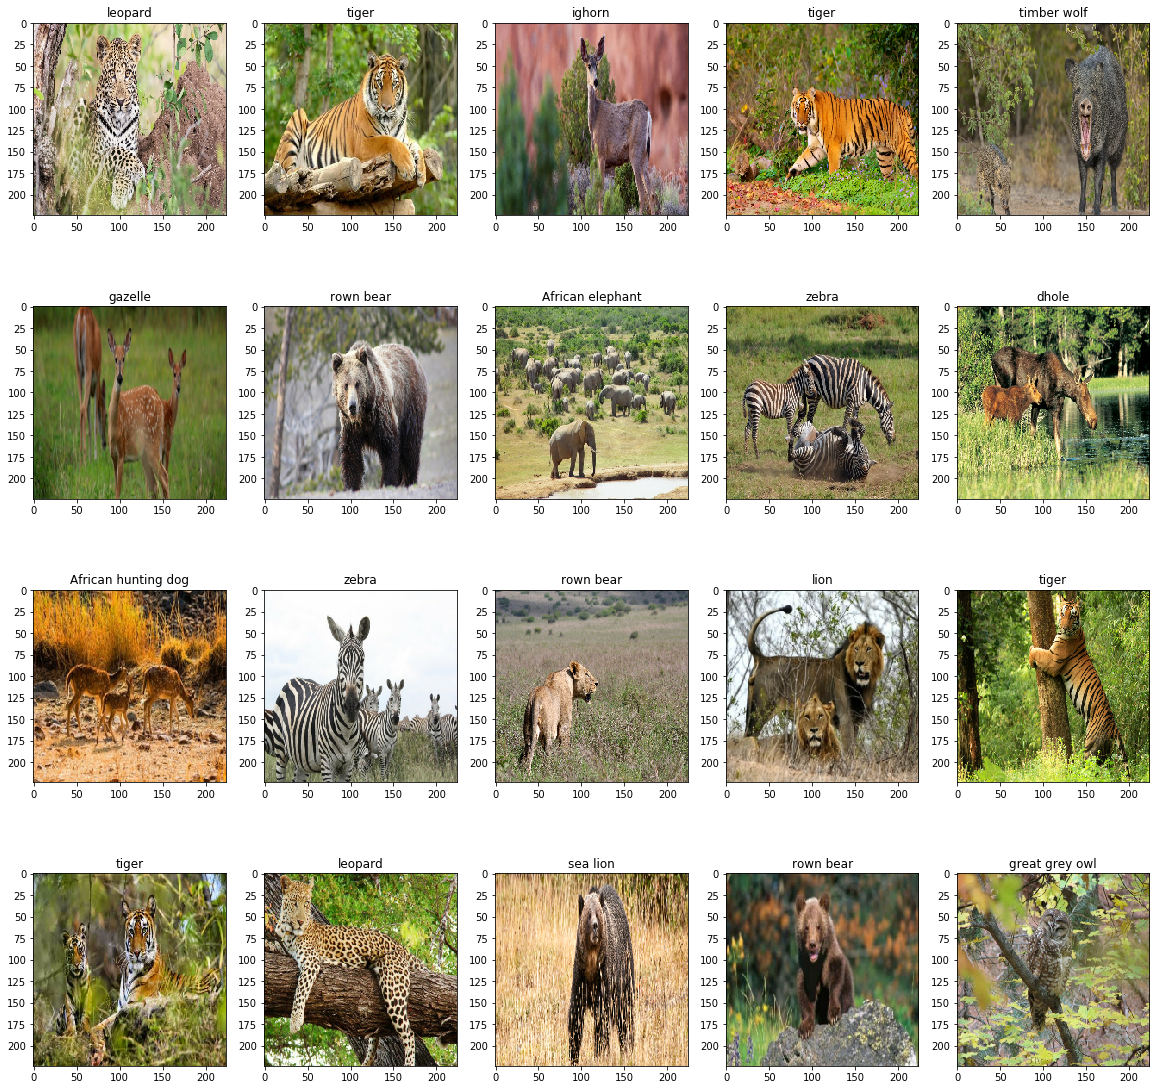

In [86]:
target_map = requests.get('https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt').content

lookup = [target.strip(r"'b'").strip(r'"') for target in str(target_map).split('\\n')]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    codes = []
    for i in range(20):
        codes.append(np.argmax(logits[i]))               
             
cols = 5
rows = math.ceil(len(images)/5)
fig=plt.figure(figsize=(20, 20))
with tf.Session() as sess:
    for idx,image in enumerate(images):
        fig.add_subplot(rows, cols, idx+1)
        plt.imshow(image.eval())
        plt.title(lookup[codes[idx]])
plt.savefig('animals.jpg', dpi=120)
plt.show()

In [0]:
image_list

['/content/downloads/animal national park/1.maxresdefault.jpg',
 '/content/downloads/animal national park/2.Royal-Bengal-Tiger.jpg',
 '/content/downloads/animal national park/3.ARK_6.jpg',
 '/content/downloads/animal national park/4.cropped-13625772024_1fd7467d29_k1.jpg',
 '/content/downloads/animal national park/7.VOYA_web_deer.jpg',
 '/content/downloads/animal national park/8.a2d539ed-8489-4eb4-a135-14e7e9e0e84a-banner.jpg',
 '/content/downloads/animal national park/9.addo-elephant-national-park-elephants-590x390.jpg',
 '/content/downloads/animal national park/10.zebras-in-kidepo-750x450.jpg',
 '/content/downloads/animal national park/11.moose-moosecalf-1280x853.jpg',
 '/content/downloads/animal national park/12.nameri-national-park-is-famous-for-which-animal.jpg',
 '/content/downloads/animal national park/13.nairobi-national-park.jpg',
 '/content/downloads/animal national park/14.Nairobi_National_Park%2C_Kenya_%2832570316676%29.jpg',
 '/content/downloads/animal national park/15.lion

In [0]:
image_list

['/content/downloads/animal national park/1.maxresdefault.jpg',
 '/content/downloads/animal national park/2.Royal-Bengal-Tiger.jpg',
 '/content/downloads/animal national park/3.ARK_6.jpg',
 '/content/downloads/animal national park/4.cropped-13625772024_1fd7467d29_k1.jpg',
 '/content/downloads/animal national park/5.2c7e0d75-c7ff-4336-99d7-259448d03a4d-banner.jpg',
 '/content/downloads/animal national park/6.national-parks-and-wildlife-sanctuaries-in-india.png',
 '/content/downloads/animal national park/7.VOYA_web_deer.jpg',
 '/content/downloads/animal national park/8.a2d539ed-8489-4eb4-a135-14e7e9e0e84a-banner.jpg',
 '/content/downloads/animal national park/9.addo-elephant-national-park-elephants-590x390.jpg',
 '/content/downloads/animal national park/10.zebras-in-kidepo-750x450.jpg',
 '/content/downloads/animal national park/11.moose-moosecalf-1280x853.jpg',
 '/content/downloads/animal national park/12.nameri-national-park-is-famous-for-which-animal.jpg',
 '/content/downloads/animal n

Report both the most likely estimated class for any image, and also investigate (a) images where the classifier isn't that certain (the best estimate is low), and (b) images where the classifier fails.

Answer (in writing in the notebook) the following - "What sorts of images do CNN classifiers do well with? What sorts do they not do so well? And what are your hypotheses for why?"

In [0]:
### YOUR CODE HERE

# Resources and Stretch Goals

Stretch goals
- Enhance your code to use classes/functions and accept terms to search and classes to look for in recognizing the downloaded images (e.g. download images of parties, recognize all that contain balloons)
- Check out [other available pretrained networks](https://tfhub.dev), try some and compare
- Image recognition/classification is somewhat solved, but *relationships* between entities and describing an image is not - check out some of the extended resources (e.g. [Visual Genome](https://visualgenome.org/)) on the topic
- Transfer learning - using images you source yourself, [retrain a classifier](https://www.tensorflow.org/hub/tutorials/image_retraining) with a new category
- (Not CNN related) Use [piexif](https://pypi.org/project/piexif/) to check out the metadata of images passed in to your system - see if they're from a national park! (Note - many images lack GPS metadata, so this won't work in most cases, but still cool)

Resources
- [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385) - influential paper (introduced ResNet)
- [YOLO: Real-Time Object Detection](https://pjreddie.com/darknet/yolo/) - an influential convolution based object detection system, focused on inference speed (for applications to e.g. self driving vehicles)
- [R-CNN, Fast R-CNN, Faster R-CNN, YOLO](https://towardsdatascience.com/r-cnn-fast-r-cnn-faster-r-cnn-yolo-object-detection-algorithms-36d53571365e) - comparison of object detection systems
- [Common Objects in Context](http://cocodataset.org/) - a large-scale object detection, segmentation, and captioning dataset
- [Visual Genome](https://visualgenome.org/) - a dataset, a knowledge base, an ongoing effort to connect structured image concepts to language